In [31]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
# to check if we are using a gpu or not
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# defining the hyperparameters 
input_size = 784 # as the mnist dataset has images with pixel size 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [5]:
# importing the dataset 
# training data
train_data = torchvision.datasets.MNIST(root = './data' , train = True , 
                                       transform = transforms.ToTensor() , download = True)
# testing data
test_dataset = torchvision.datasets.MNIST(root = './data' , train = False , 
                                       transform = transforms.ToTensor() , download = False)
# creating a dataloader
train_loader = torch.utils.data.DataLoader(dataset = train_data , batch_size = batch_size , shuffle = True)


100%|██████████| 9912422/9912422 [00:02<00:00, 4261104.46it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 27751590.80it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:01<00:00, 920721.20it/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 1439296.52it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



NameError: name 'test_data' is not defined

In [7]:
test_loader = torch.utils.data.DataLoader(dataset = test_dataset , batch_size = batch_size , shuffle = False)

In [15]:
# we need to create an iterator for our dataLoader 
examples = iter(test_loader)
example_data , example_targets = next(examples)
print(example_data)
example_targets

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])

In [17]:
example_data.shape , example_targets.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

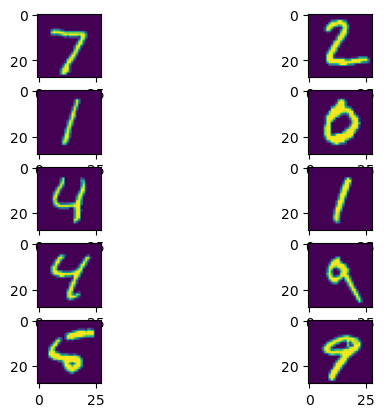

In [26]:
for i in range(10):
    # the first parameter of the subplot is how many images in one col
    # the second parameter is that how many images to show in one row
    plt.subplot(5,2,i+1)
    plt.imshow(example_data[i][0])
    # if want to see it in grayscale use cmap = 'gray'
plt.show()

In [82]:
class Model(nn.Module):
    def __init__(self , input_size , hidden_size , output_size):
        # we need to remember that the output size here will be the 
        # numbr of classes 
        super(Model , self).__init__()
        #our first layer is a linear layer 
        self.l1 = nn.Linear(input_size , hidden_size)
        # applying activation function after the first layer 
        self.relu = nn.ReLU()
        # final layer is also a linear layer 
        self.l2 = nn.Linear(hidden_size , output_size)
        
    def forward(self , x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax required at the end 
        return out

In [83]:
model = Model(input_size , hidden_size , 10)

In [84]:
# we need to create a loss function and an optimizer 
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = learning_rate)

In [61]:
train_loader_list = list(train_loader)
len(train_loader_list)

600

In [88]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criteria(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
                

Epoch [1/2], Step [100/600], Loss: 0.0380
Epoch [1/2], Step [200/600], Loss: 0.1200
Epoch [1/2], Step [300/600], Loss: 0.0569
Epoch [1/2], Step [400/600], Loss: 0.0662
Epoch [1/2], Step [500/600], Loss: 0.1566
Epoch [1/2], Step [600/600], Loss: 0.1258
Epoch [2/2], Step [100/600], Loss: 0.0396
Epoch [2/2], Step [200/600], Loss: 0.1068
Epoch [2/2], Step [300/600], Loss: 0.0316
Epoch [2/2], Step [400/600], Loss: 0.1202
Epoch [2/2], Step [500/600], Loss: 0.1497
Epoch [2/2], Step [600/600], Loss: 0.0130


In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')